# Coin Toss Example

In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.constants import g

## The dynamics of a coin toss

In the lecture we proved that the dynamics of an idealized 2D coin can be described by the initial value problem:
$$
\begin{array}{ccc}
\ddot{y} &=& -g,\\
\ddot{\theta} &=& 0,\\
y(0) &=& 0,\\
\theta(0) &=& 0,\\
\dot{y}(0) &=& v_0,\\
\dot{\theta}(0) &=& \omega_0.
\end{array}
$$
Here we have assumed that the coin is always toss vertically from position, $y(0)=0$, while laying flat, $\theta(0)=0$, showing heads.
$y(t)$ measures the vertical distance from the tossing finger, and $\theta(t)$ measures the angle of the coin with respect to the horizontal axis.
$v_0$ is the initial tossing velocity and $\omega_0$ is tossing angular velocity.
$g$ is the acceleration of gravity.

Therefore, the only free parameters that determine the outcome of the coin are $v_0$ and $\omega_0$.

It is trivial to solve this initial value problem. The solution is:
$$
\begin{array}{ccc}
y(t) &=& -\frac{1}{2}gt^2 + v_0t,\\
\theta(t) &=& \omega_0t.
\end{array}
$$

Using the first equation, we can find the time $t_1$ at which the coin returns to the hand. That time is:
$$
y(t_1) = 0 \implies t_1 = \frac{2v_0}{g}.
$$

With this result, we can predict the angle the coin makes with the horizontal axis when it returns to the hand. That angle is:
$$
\theta(t_1) = \frac{2v_0\omega_0}{g}.
$$

This angle is enough for predicting the outcome of a tossing experiment.
Specifically, we will get **heads** if
$$
\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(0,\frac{\pi}{2}\right)\cup\left(\frac{3\pi}{2},2\pi\right),
$$
and **tails** if
$$
\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right).
$$
Note that we have used $\text{mod}\;2\pi$ to find a unique angle between $0$ and $2\pi$.

Now let $X\in\{H,T\}$ be a variable describing the result of the coin toss. We have shown that, conditional on knowning $v_0$ and $\omega_0$ we can predict $X$ exactly. Mathematically, we can write:
$$
X = 
\begin{cases}
T,&\;\text{if}\;\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right),\\
H,&\;\text{otherwise}.
\end{cases}
$$

## Simulation of a coin toss experiment

A typical human throws the coin with
$$
v_0 \approx 2.2\;\text{m/s},
$$
and
$$
\omega_0 \approx 100\times 2\pi\;\text{rad/s}.
$$
Let us simulate how sensitive is the result on the choice of these parameters.

In [2]:
# Let us code H as 0 and T as 1.
def X(v0, omega0):
    tmp = (2 * v0 * omega0 / g) % (2. * np.pi) # taking g = 9.8 m/s**2
    if tmp > 0.5 * np.pi and tmp < 1.5 * np.pi:
        return 1
    return 0

In [3]:
# Try it out here:
v0 = 95
omega0 = np.pi * (1./2)
print X(v0, omega0)

0


In [4]:
# Let's do some interactive tests
from ipywidgets import interactive
def print_X(v0, omega0):
    print "X = ", X(v0, omega0)
interactive(print_X, v0=(2., 3., 0.1), omega0=(100*2*np.pi, 1000*2*np.pi, 5))

A Jupyter Widget

## Rise of uncertainty

As we saw, the outcome of a coin toss experiment is:
$$
X = 
\begin{cases}
T,&\;\text{if}\;\frac{2v_0\omega_0}{g} (\text{mod}\;2\pi) \in \left(\frac{\pi}{2},\frac{3\pi}{2}\right),\\
H,&\;\text{otherwise}.
\end{cases}
$$
Let's think of it as a function of $(v_0,\omega_0)$.
It is obvious that $X$ flips whenever
$$
\frac{2v_0\omega_0}{g} = 2\pi k + \frac{\pi}{2},
$$
for $k=1,2,\dots$, as well as whenever
$$
\frac{2v_0\omega_0}{g} = 2\pi k + \frac{3\pi}{2}.
$$
Let's plot some of these curves in the $v_0-\omega_0$ plane.

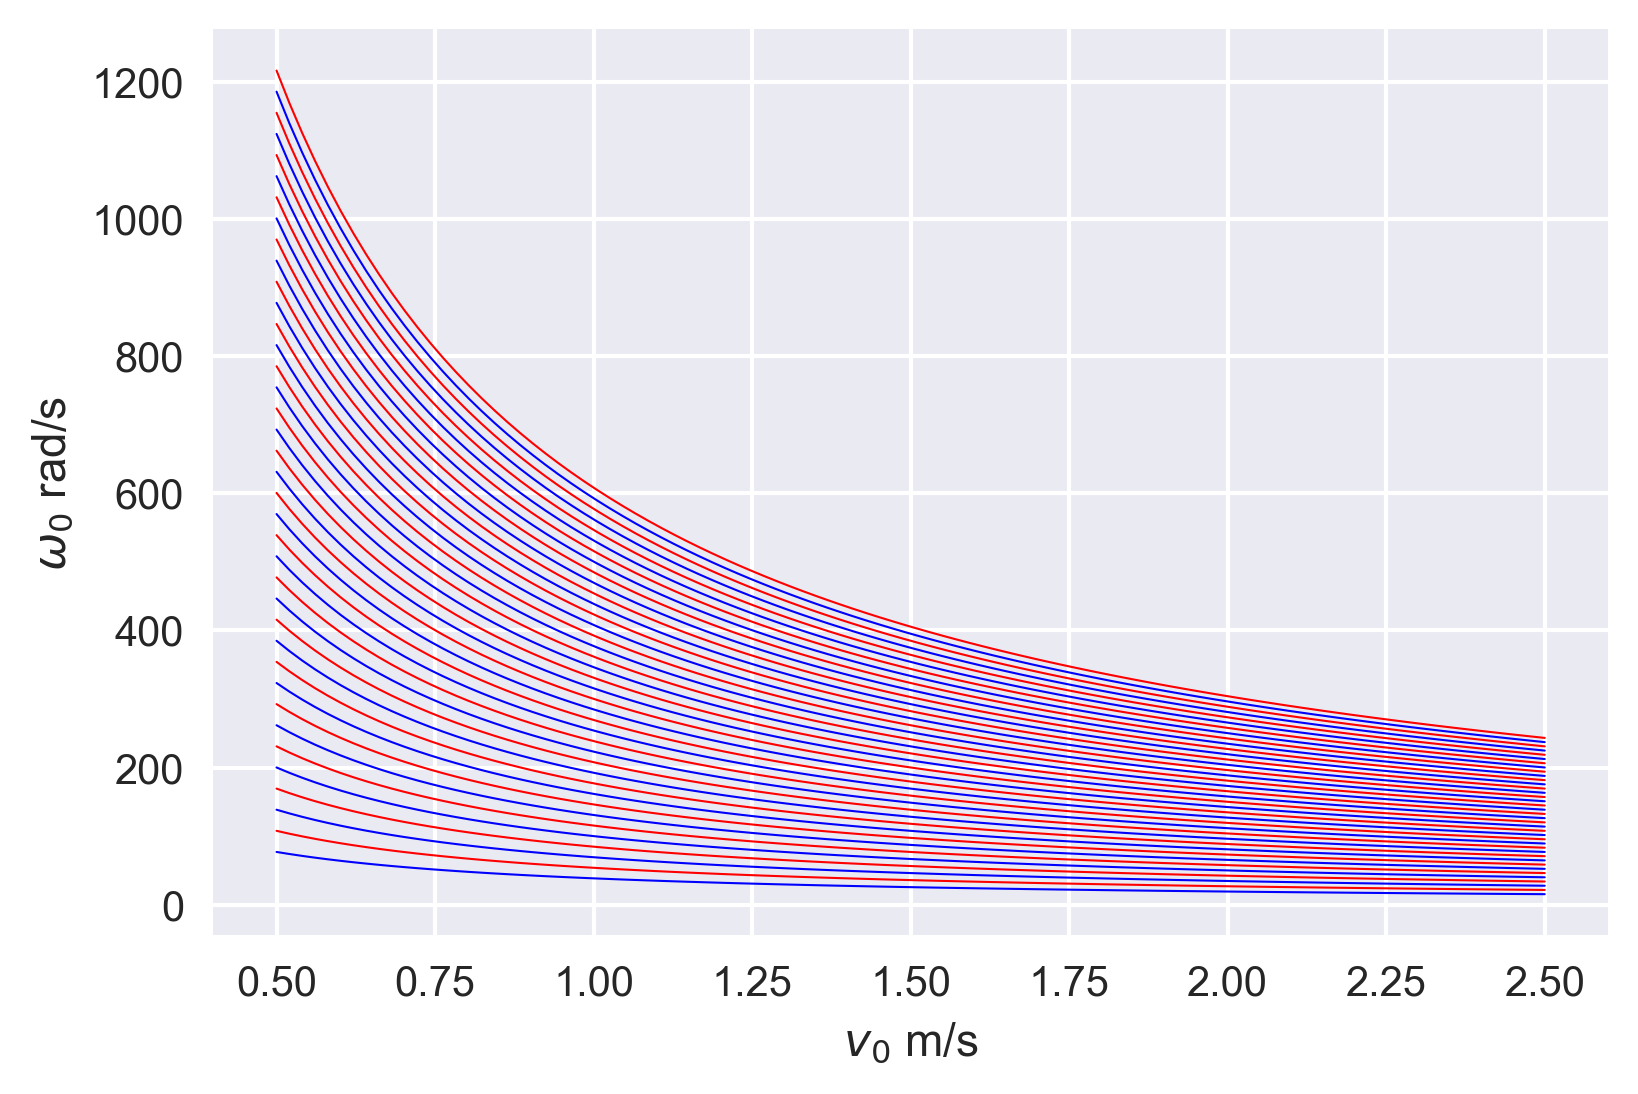

In [11]:
fig, ax = plt.subplots()
v_0 = np.linspace(0.5, 2.5, 100)
for k in range(1,20):
    omega_01 = 9.8 * (2 * np.pi * k + 0.5 * np.pi) / (2 * v_0)
    omega_02 = 9.8 * (2 * np.pi * k + 1.5 * np.pi) / (2 * v_0)
    ax.plot(v_0, omega_01, 'b', lw=0.5)
    ax.plot(v_0, omega_02, 'r', lw=0.5)
ax.set_xlabel(r'$v_0$ m/s')
ax.set_ylabel(r'$\omega_0$ rad/s')

Now let us pick an uncertainty box for the initial conditions, throw the coin repeatedly, and measure the frequency it comes up H.

In [6]:
def measure_freq_of_H(v_0_l, v_0_u, omega_0_l, omega_0_u, N=1000):
    res = 0.
    for n in range(N):
        v_0 = np.random.rand() * (v_0_u - v_0_l) + v_0_l
        omega_0 = np.random.rand() * (omega_0_u - omega_0_l) + omega_0_l
        res += X(v_0, omega_0)
    return res / N

In [66]:
measure_freq_of_H(2.1, 2.2, 200*2*np.pi, 200.1*2*np.pi, N=100000)

0.49464

### Question 01

In this experiment we study the uncertainty in the outcome of a coin toss as a consequence of uncertainty in the initial conditions of IVP described earlier. 

a. Are these the only sources of uncertainty? If not, what other factors could contribute to the uncertainty of the coin toss outcome? 

b. In the function, ``` measure_freq_of_H``` we sample $v_0$ and $\omega_0$ independently from uniform distributions. Is this the best way to formalize the uncertainty around the initial conditions? If not 

In [15]:
N = np.arange(2, 9)
res = np.zeros_like(N)
for i in xrange(res.shape[0]):
    n  = N[i]
    res[i] = measure_freq_of_H(v_0_l =2.0, v_0_u = 2.25, omega_0_l = 200*np.pi, omega_0_u = 201*np.pi, N = 10**n)

In [16]:
print res

[0 0 0 0 0 0 0]
